In [7]:
import img_utils
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline



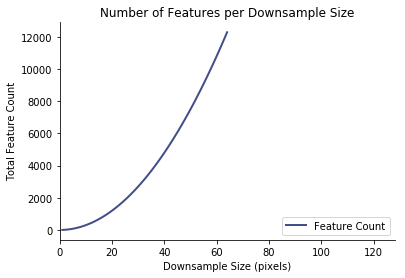

In [9]:
sizes = np.linspace(1, 64, 100)
features = [3*size**2 for size in sizes]
fig, axs = img_utils.make_subplot(rows=1, cols=1)
img_utils.lineplot(axs, sizes, features, 
                   label="Feature Count", x_label="Downsample Size (pixels)", y_label="Total Feature Count",
                   title="Number of Features per Downsample Size", color=1
                  )
# plt.savefig('../report/feature_graph.png', dpi=300, bbox_inches='tight')

In [3]:
nb = pd.read_csv('nb_data.csv', index_col=0)
lr = pd.read_csv('lr_data.csv', index_col=0)

In [4]:
nb

,fit_time_mean,fit_time_std,score_time_mean,score_time_std,test_score_mean,test_score_std,train_score_mean,train_score_std
1,0.007360,0.000029,0.002980,0.000038,0.566331,0.004086,0.565392,0.002159
2,0.006068,0.001257,0.006621,0.004530,0.579330,0.002749,0.580542,0.002183
4,0.016339,0.001988,0.006141,0.000480,0.602028,0.001989,0.601751,0.001944
8,0.762249,0.029353,0.405550,0.061374,0.617782,0.002737,0.617673,0.001741
16,2.438300,0.028396,0.558748,0.017829,0.629571,0.002397,0.629627,0.002550
32,5.127122,0.031560,1.155549,0.025101,0.641028,0.005638,0.642242,0.004375
64,29.284642,0.097810,3.072777,0.078301,0.646427,0.005298,0.647807,0.002910
128,298.230657,4.785988,81.116410,4.369528,0.646538,0.004278,0.648578,0.002618


In [5]:
lr

,fit_time_mean,fit_time_std,score_time_mean,score_time_std,test_score_mean,test_score_std,train_score_mean,train_score_std
1,0.697071,0.047079,0.003243,0.000592,0.596191,0.005320,0.595362,0.003805
2,0.278704,0.045799,0.001817,0.000453,0.642463,0.002768,0.643234,0.001718
4,0.533516,0.003651,0.003443,0.001618,0.699318,0.004972,0.702182,0.003780
8,1.495859,0.166808,0.004066,0.000884,0.736115,0.003189,0.746199,0.001869
16,5.575640,0.012365,0.009355,0.000346,0.752315,0.001642,0.778757,0.002203
32,15.443120,0.106235,0.028748,0.004613,0.738318,0.004101,0.783605,0.002655
64,67.491862,0.532415,0.129231,0.007236,0.735230,0.011016,0.794732,0.005994
128,1747.609901,18.698939,12.237502,4.977280,0.722562,0.005650,0.822112,0.005003


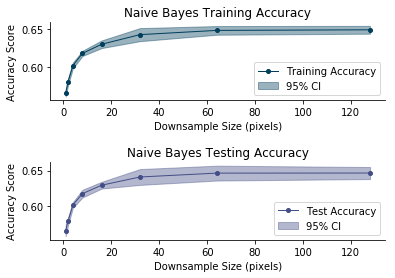

In [13]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], nb.index, 
                   list(nb['train_score_mean']), list(nb['train_score_std']), 
                   label="Training Accuracy", title="Naive Bayes Training Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=0)
img_utils.lineplot_ci(axs[1], nb.index, 
                   list(nb['test_score_mean']), list(nb['test_score_std']), 
                   label="Test Accuracy", title="Naive Bayes Testing Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=1)
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/nb_graph_score.png', dpi=300, bbox_inches='tight')

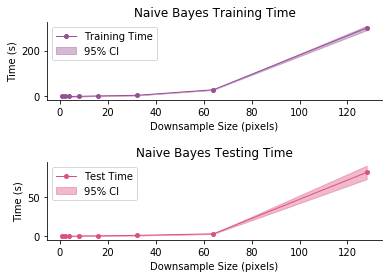

In [14]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], nb.index, 
                   list(nb['fit_time_mean']), list(nb['fit_time_std']), 
                   label="Training Time", title="Naive Bayes Training Time",
                   x_label="Downsample Size (pixels)", y_label="Time (s)",
                   color=2, loc="upper left")
img_utils.lineplot_ci(axs[1], nb.index, 
                   list(nb['score_time_mean']), list(nb['score_time_std']), 
                   label="Test Time", title="Naive Bayes Testing Time",
                   x_label="Downsample Size (pixels)", y_label="Time (s)",
                   color=3, loc="upper left")
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/nb_graph_time.png', dpi=300, bbox_inches='tight')

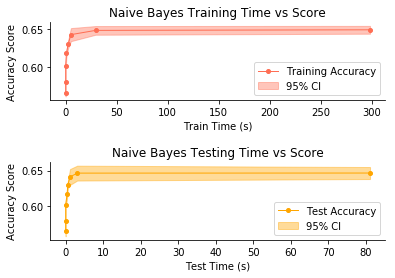

In [15]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], list(nb['fit_time_mean']), 
                   list(nb['train_score_mean']), list(nb['train_score_std']), 
                   label="Training Accuracy", title="Naive Bayes Training Time vs Score",
                   x_label="Train Time (s)", y_label="Accuracy Score",
                   color=4)
img_utils.lineplot_ci(axs[1], list(nb['score_time_mean']), 
                   list(nb['test_score_mean']), list(nb['test_score_std']), 
                   label="Test Accuracy", title="Naive Bayes Testing Time vs Score",
                   x_label="Test Time (s)", y_label="Accuracy Score",
                   color=5)
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/nb_graph_time_score.png', dpi=300, bbox_inches='tight')

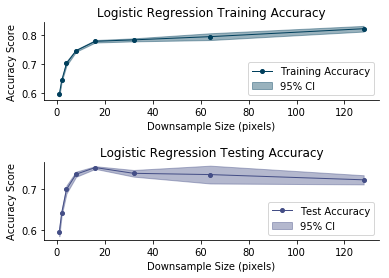

In [16]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], lr.index, 
                   list(lr['train_score_mean']), list(lr['train_score_std']), 
                   label="Training Accuracy", title="Logistic Regression Training Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=0)
img_utils.lineplot_ci(axs[1], lr.index, 
                   list(lr['test_score_mean']), list(lr['test_score_std']), 
                   label="Test Accuracy", title="Logistic Regression Testing Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=1)
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/lr_graph_score.png', dpi=300, bbox_inches='tight')

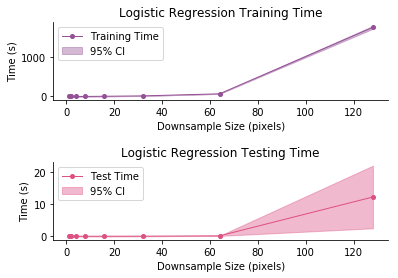

In [17]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], lr.index, 
                   list(lr['fit_time_mean']), list(lr['fit_time_std']), 
                   label="Training Time", title="Logistic Regression Training Time",
                   x_label="Downsample Size (pixels)", y_label="Time (s)",
                   color=2, loc="upper left")
img_utils.lineplot_ci(axs[1], lr.index, 
                   list(lr['score_time_mean']), list(lr['score_time_std']), 
                   label="Test Time", title="Logistic Regression Testing Time",
                   x_label="Downsample Size (pixels)", y_label="Time (s)",
                   color=3, loc="upper left")
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/lr_graph_time.png', dpi=300, bbox_inches='tight')

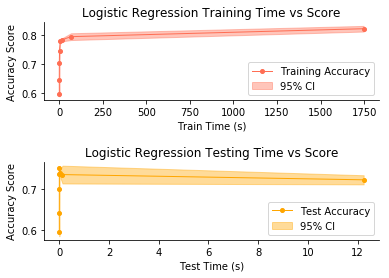

In [18]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], list(lr['fit_time_mean']), 
                   list(lr['train_score_mean']), list(lr['train_score_std']), 
                   label="Training Accuracy", title="Logistic Regression Training Time vs Score",
                   x_label="Train Time (s)", y_label="Accuracy Score",
                   color=4)
img_utils.lineplot_ci(axs[1], list(lr['score_time_mean']), 
                   list(lr['test_score_mean']), list(lr['test_score_std']), 
                   label="Test Accuracy", title="Logistic Regression Testing Time vs Score",
                   x_label="Test Time (s)", y_label="Accuracy Score",
                   color=5)
plt.subplots_adjust(hspace = 0.8)
plt.savefig('../report/lr_graph_time_score.png', dpi=300, bbox_inches='tight')

In [10]:
bn = pd.read_csv('bayes_net_ret.csv', index_col=0)
bn

,fit_time_mean,fit_time_std,score_time_mean,score_time_std,train_score_mean,train_score_std,test_score_mean,test_score_std
1,0.002333,0.000577,0.052333,0.000577,0.650996,0.000565,0.654552,0.016048
2,0.013333,0.006658,0.178667,0.003055,0.656383,0.000510,0.667401,0.011445
4,0.042333,0.012858,1.222333,0.087231,0.669319,0.001959,0.676211,0.008811
8,0.151333,0.017039,12.858667,0.559609,0.679685,0.002403,0.683554,0.012765
16,0.735000,0.097872,239.262700,2.676474,0.681481,0.001776,0.682085,0.013945


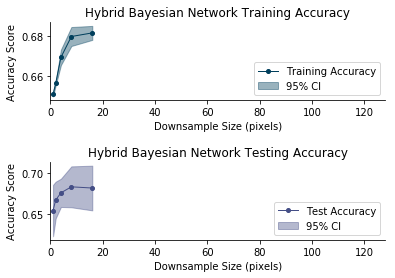

In [15]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
axs[0].set_xlim([0,128])
axs[1].set_xlim([0,128])
img_utils.lineplot_ci(axs[0], bn.index, 
                   list(bn['train_score_mean']), list(bn['train_score_std']), 
                   label="Training Accuracy", title="Hybrid Bayesian Network Training Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=0)
img_utils.lineplot_ci(axs[1], bn.index, 
                   list(bn['test_score_mean']), list(bn['test_score_std']), 
                   label="Test Accuracy", title="Hybrid Bayesian Network Testing Accuracy",
                   x_label="Downsample Size (pixels)", y_label="Accuracy Score",
                   color=1)
plt.subplots_adjust(hspace = 0.8)
# plt.savefig('../report/bn_graph_score.png', dpi=300, bbox_inches='tight')

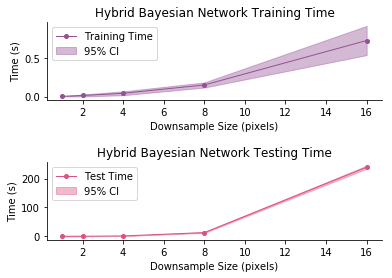

In [14]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], bn.index, 
                   list(bn['fit_time_mean']), list(bn['fit_time_std']), 
                   label="Training Time", title="Hybrid Bayesian Network Training Time",
                   x_label="Downsample Size (pixels)", y_label="Time (s)",
                   color=2, loc="upper left")
img_utils.lineplot_ci(axs[1], bn.index, 
                   list(bn['score_time_mean']), list(bn['score_time_std']), 
                   label="Test Time", title="Hybrid Bayesian Network Testing Time",
                   x_label="Downsample Size (pixels)", y_label="Time (s)",
                   color=3, loc="upper left")
plt.subplots_adjust(hspace = 0.8)
# plt.savefig('../report/bn_graph_time.png', dpi=300, bbox_inches='tight')

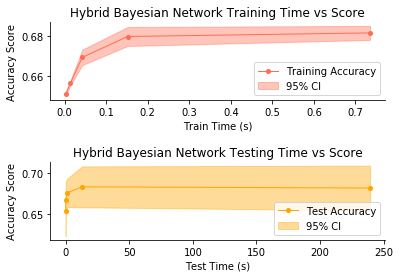

In [15]:
fig, axs = img_utils.make_subplot(rows=2, cols=1)
img_utils.lineplot_ci(axs[0], list(bn['fit_time_mean']), 
                   list(bn['train_score_mean']), list(bn['train_score_std']), 
                   label="Training Accuracy", title="Hybrid Bayesian Network Training Time vs Score",
                   x_label="Train Time (s)", y_label="Accuracy Score",
                   color=4)
img_utils.lineplot_ci(axs[1], list(bn['score_time_mean']), 
                   list(bn['test_score_mean']), list(bn['test_score_std']), 
                   label="Test Accuracy", title="Hybrid Bayesian Network Testing Time vs Score",
                   x_label="Test Time (s)", y_label="Accuracy Score",
                   color=5)
plt.subplots_adjust(hspace = 0.8)
# plt.savefig('../report/bn_graph_time_score.png', dpi=300, bbox_inches='tight')